In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline
import math
from keras.utils import np_utils

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (test_x, test_y) = cifar10.load_data()

num_classes = 10
train_y_cls = np_utils.to_categorical(y_train,num_classes)
test_y_cls = np_utils.to_categorical(test_y,num_classes)

print("Size of:")
print("- Training-set:\t\t{}".format(len(x_train)))
print("- Test-set:\t\t{}".format(len(test_x)))

In [ ]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_names = load_label_names()

def label_to_array(cls_true):
    true = cls_true.tolist()
    true_label = []
    for l in true:
        true_label += l
    return true_label
    

### Create Random Validation and train data

In [ ]:
combined_size = x_train.shape[0]
split_size = 0.2

In [ ]:
# Helper-function for splitting the combined data-set into a random training- and validation-set.

def random_training_set(split_size):
    
    train_size = int(combined_size*(1-split_size))

    # Create a randomized index into the full / combined training-set.
    idx = np.random.permutation(combined_size)

    # Split the random index into training- and validation-sets.
    idx_train = idx[0:train_size]
    idx_validation = idx[train_size:]

    # Select the images and labels for the new training-set.
    train = x_train[idx_train, :]
    labels = y_train[idx_train, :]

    # Select the images and labels for the new validation-set.
    x_validation = x_train[idx_validation, :]
    y_validation = y_train[idx_validation, :]

    # Return the new training- and validation-sets.
    return train, labels, x_validation, y_validation


In [ ]:
# Split data into random training and validation data
train_x, train_y, validation_x, validation_y = random_training_set(split_size)

train_y_cls = np_utils.to_categorical(train_y,num_classes)
validation_y_cls = np_utils.to_categorical(validation_y,num_classes)

print (train_x.shape)
print (validation_x.shape)

In [ ]:
#Data Dimensions

# CIFAR-10 images are 32 pixels in each dimension.
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images:
num_channels = 3

# Number of classes, one class for each of 10 digits.
num_classes = 10

input_shape = (img_size, img_size, num_channels)

In [ ]:
#Plotting Images

def plot_images(images, cls_true, cls_pred=None, smooth=True):

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
#Preparing Data
def data_prep(train, validation,test, subtract_pixel_mean):
    # Normalize Data
    train = train.astype('float32')/255
    validation = validation.astype('float32')/255
    test = test.astype('float32')/255
    
    # If subtract pixel mean is enabled
    if subtract_pixel_mean:
        train_mean = np.mean(train, axis=0)
        train -= train_mean
        validation -= train_mean
        test -= train_mean
        
    return train, validation, test


In [ ]:
# Subtract per pixel
subtract_pixel_mean = True

train_x, validation_x, test_x = data_prep(train_x, validation_x, test_x, subtract_pixel_mean)

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def augment_batches(batch_size, data):
    '''
    Return a total of `num` samples
    '''
    
    images=batch_size
    while(images + batch_size <= len(data)):
        prev_no = images
        images += batch_size
        data[prev_no:images] = crop_images(data[prev_no:images])
    
    return data


# Padding images to 36x36 then randomly crop 32x32 size images
def crop_images(train):
    
    # Zero pad images to 36x36 size
    train = tf.image.resize_with_crop_or_pad(train,
                                             target_height=36,
                                             target_width=36).numpy()
    train = tf.image.random_crop(train, size=[train.shape[0], 32, 32, 3])
    
    return train.numpy()


In [ ]:
## Choose if random crop of images should be done or not
image_crop = False

if (image_crop):
    train_x = augment_batches(train_x)


In [ ]:
# Get the first 9 images from the test-set.
images = train_x[0:9]

# Get the true classes for those images.
cls_true = train_y[0:9]
cls_true = label_to_array(cls_true)

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true)


### Import Required Libraries

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import SGD

## DenseNet Block and Layer

##### A deep look inside a DenseNet Block
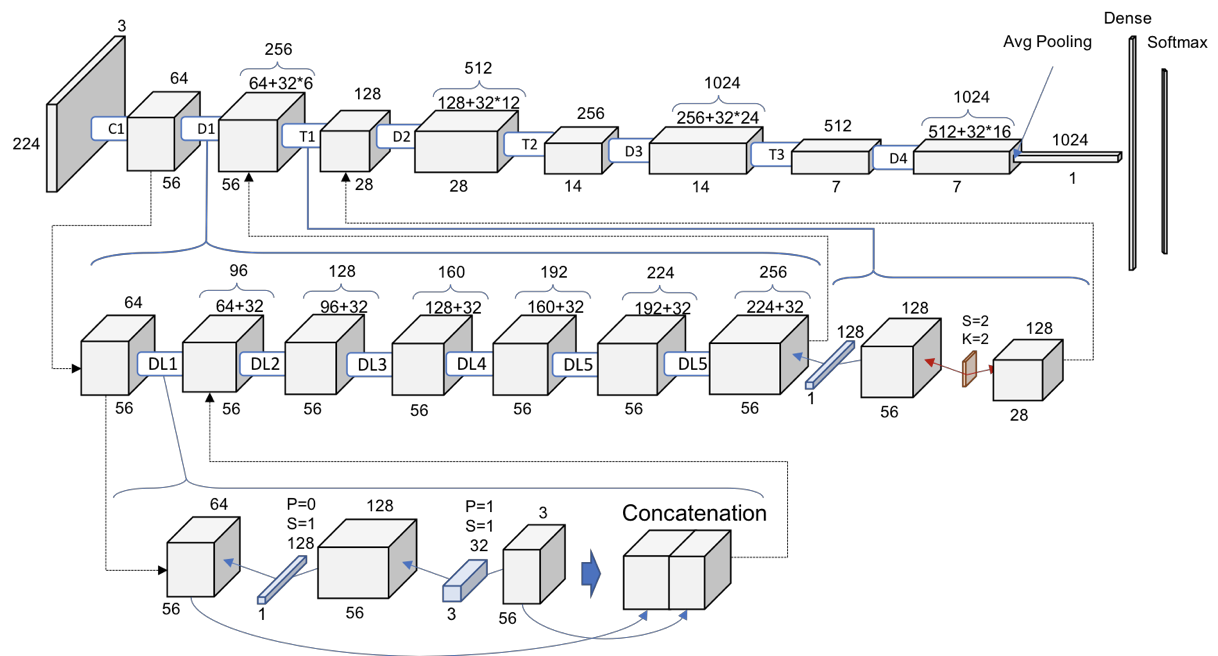

##### A deep look inside a Dense Layer
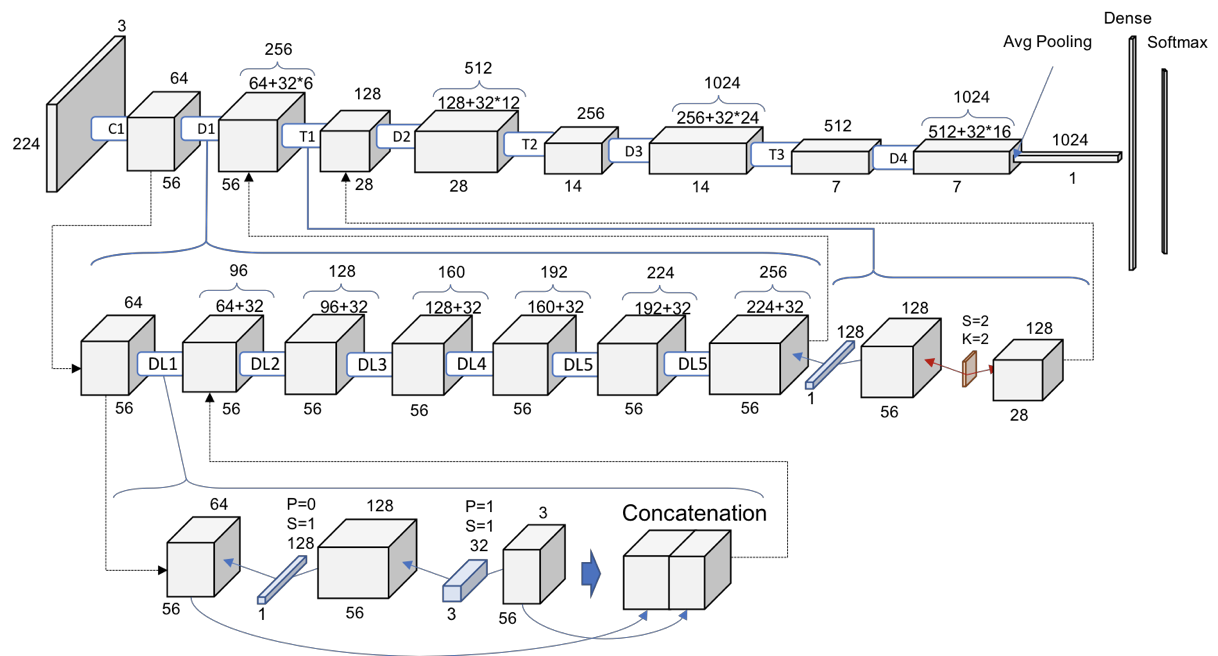

#### For implementation on Cifar-10 , we are using 3 dense blocks 16 dense layers in each dense blocks 

In [ ]:
# Dense Block
def dense_block(net, depth, growth_rate, in_features, block):
    '''
    Arguments:
    depth -- no of dense layers in a dense block (i.e. 16)
    in_features -- no of output feature maps of previous dense block
    block --  current block 
    '''

    # Save current layer to concatenate with produced feature-map
    input_layer = net
    for i in range(depth):
        
        # 1x1 Convolution to reduce size
        net = BatchNormalization(name = bn_layer1x1)(net)
        net = Activation('relu')(net)
        net = Conv2D(4*growth_rate, kernel_size=(1,1), strides=(1,1),
                     padding='valid', name=conv_layer1x1)(net)
        net = Dropout(0.2)(net)
        
        # 3x3 Convolutions 
        net = BatchNormalization()(net)
        net = Activation('relu')(net)
        net = Conv2D(growth_rate, kernel_size=(3,3), strides=(1,1),
                     padding='same')(net)
        net = Dropout(0.2)(net)
        
        # Concatinate previous layer and output feature-map
        net = concatenate([input_layer,net], axis=-1)

        input_layer = net
                
        # No of outpzt feature maps of dense block
        out_features = growth_rate*depth + in_features
    
    return net, out_features
        

In [ ]:
# Dense Block
def dense_block(net, depth, growth_rate, in_features, block):
    '''
    Arguments:
    depth -- no of dense layers in a dense block (i.e. 16)
    in_features -- no of output feature maps of previous dense block
    block --  current block 
    '''

    # Save current layer to concatenate with produced feature-map
    input_layer = net
    for i in range(depth):
        
        # 1x1 Convolution to reduce size
        net = BatchNormalization()(net)
        net = Activation('relu')(net)
        net = Conv2D(4*growth_rate, kernel_size=(1,1), strides=(1,1),
                     padding='valid')(net)
        net = Dropout(0.2)(net)
        
        # 3x3 Convolutions 
        net = BatchNormalization()(net)
        net = Activation('relu')(net)
        net = Conv2D(growth_rate, kernel_size=(3,3), strides=(1,1),
                     padding='same')(net)
        net = Dropout(0.2)(net)
        
        # Concatinate previous layer and output feature-map
        net = concatenate([input_layer,net], axis=-1)

        input_layer = net
                
        # No of outpzt feature maps of dense block
        out_features = growth_rate*depth + in_features
    
    return net, out_features
        

In [ ]:
# Transition Block
def transition_block(net, n, in_features, block):
    '''
    Arguments:
    n -- compression_factor to reduce no of input feature maps
    in_features -- no of output feature maps of previous dense block
    block --  current block 
    '''
    # No of output feature maps of transition block
    out_features = int(n*in_features)
    
    net = BatchNormalization(name='bn_transition_block'+str(block))(net)
    net = Activation('relu')(net)
    net = Conv2D(out_features, kernel_size=(1,1), strides=(1,1),
                 padding='same', name='Conv_transition_block'+str(block))(net)
    net = Dropout(0.2)(net)
    
    # Avg pooling 
    net = AveragePooling2D((2,2))(net)
    
    return net, out_features
    

## DenseNet Architecture

DenseNet-100–12 on CIFAR10
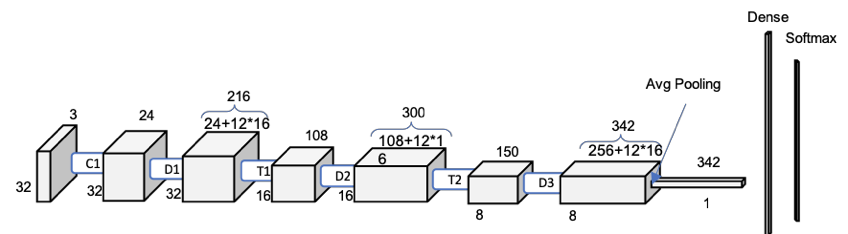

In [ ]:
def DenseNet(input_shape, num_blocks, growth_rate, compression, num_classes, depth):
    """
    Implementation of the DenseNet 
    Architecture of a each of Conv layer: BN -> ReLU -> Conv -> Dropout(0.2)
    
    Arguments:
    input_shape -- shape of the images of the dataset
    blocks -- no of dense blocks
    growth_rate -- no of feature maps produced by each layer
    classes -- integer, number of classes
    depth -- array containing the no of layers in a dense block

    Returns:
    model -- a Model() instance in Keras
    """
    
    #No of layers in transition block
    n=compression
    
    # Define a tensor with input shape
    inputs = Input(input_shape)
    
    # Stage 1 --> 3x3 Convolution with 24 filters and stride 1
    net = Conv2D(24, (3,3), strides=(1,1), padding='same',
                name='conv1')(inputs)
    
    # Input features to first dense_block
    num_features = 24
    
    # Dense block followed by a transition block
    for block in range(num_blocks):
        if (block+1)==num_blocks: # Last block
            # No transition layer after last block
            net, num_features = dense_block(net=net, 
                                            depth=depth[block],
                                            growth_rate=growth_rate,
                                            in_features=num_features,
                                            block=block+1)
            
        else:
            net, num_features = dense_block(net=net, 
                                            depth=depth[block],
                                            growth_rate=growth_rate,
                                            in_features=num_features, 
                                            block=block+1)
            
            net, num_features = transition_block(net=net,
                                                 n=compression,
                                                 in_features=num_features,
                                                 block=block+1)
    
    net = BatchNormalization(name='bn_conv_last')(net)
    net = Activation('relu')(net)
    net = AveragePooling2D((2,2), strides=(2,2))(net)
    
    #Flatten layer
    net = Flatten()(net)
    net = Dense(num_classes, name='Dense-layer')(net)
    net = Activation('softmax')(net)
    
    # Create Model
    model = Model(inputs=inputs, outputs=net, name='DenseNet')
    
    return model

In [ ]:
# Define parameters
num_blocks=4
compression=0.5
growth_rate=12

# for DenseNet 121
depth121=[6,12,24,26]

# for DenseNet 169 
depth169=[6,12,32,32]

# For DenseNet 201
depth201=[6,12,48,32]

# For DenseNet 161
depth161 = [6,12,36,24]

# Creating Model
model = DenseNet(input_shape=input_shape,
                 num_blocks=num_blocks, 
                 growth_rate=growth_rate,
                 compression=compression,
                 num_classes=num_classes,
                 depth = depth121)


In [ ]:
model.summary()

In [ ]:
num_epochs = 50

# Initialize the optimizer and compile the model
optimizer = SGD(lr=0.0, momentum=0.9, decay=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,
             metrics=['accuracy'])


## Decay Function
By using decay function, schedule drop the learning rate by a factor of 0.1 after 50% epochs and then again after 75% epochs

In [ ]:
# Define decay function
  
def decay_fn(epoch, lr):
    if epoch < int(num_epochs*0.5):
        return 0.1
    elif epoch >= int(num_epochs*0.5) and epoch < int(num_epochs*0.75):
        return 0.01
    else:
        return 0.001

# learning schedule callback
lrate = tf.keras.callbacks.LearningRateScheduler(decay_fn)
callbacks_list = [lrate]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Train with data augmentation
data_augmentation = False

### Training the Model

In [ ]:
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    h = model.fit(train_x, train_y_cls,
                  batch_size = 64,
                  validation_data=(validation_x, validation_y_cls),
                  callbacks=callbacks_list, 
                  epochs = num_epochs,
                  verbose = 1)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random zoom
        zoom_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_x)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(train_x, train_y_cls,
                                     batch_size=64),
                                     validation_data=(validation_x, validation_y_cls),
                                     epochs=num_epochs, verbose=1, workers=4,
                                     callbacks=callbacks_list)

In [ ]:
result = model.evaluate(test_x, test_y_cls)

In [ ]:
#Predict on test_set
pred_y = model.predict(test_x)
pred_cls = np.argmax(pred_y, axis=1)

In [ ]:
#Some predicted Images
# Get the first 9 images from the test-set.
images = test_x[0:9]

# Get the true classes for those images.
cls_true = test_y[0:9]
cls_true = label_to_array(cls_true)

#Get Predicted Classes
cls_pred = pred_cls[0:9]
cls_pred = cls_pred.tolist()

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true, cls_pred)